In [1]:
import numpy as np
from sklearn import manifold
from sklearn.metrics import euclidean_distances

A = np.matrix('5 2 1 5; 4 5 2 3; 2 5 5 1; 5 3 1 5; 3 4 5 2; 1 4 3 5')

In [2]:
mean = A.mean()
print(mean)
vfrestarmean = np.vectorize(lambda x: x - mean)

# centro los datos
A = vfrestarmean(A)
A

3.375


matrix([[ 1.625, -1.375, -2.375,  1.625],
        [ 0.625,  1.625, -1.375, -0.375],
        [-1.375,  1.625,  1.625, -2.375],
        [ 1.625, -0.375, -2.375,  1.625],
        [-0.375,  0.625,  1.625, -1.375],
        [-2.375,  0.625, -0.375,  1.625]])

In [3]:
dist_usuarios = euclidean_distances(A)
print(dist_usuarios)
print('')
dist_peliculas = euclidean_distances(A.transpose())
print(dist_peliculas)

[[0.         3.87298335 7.07106781 1.         5.74456265 4.89897949]
 [3.87298335 0.         4.12310563 3.16227766 3.46410162 3.87298335]
 [7.07106781 4.12310563 0.         6.70820393 1.73205081 4.69041576]
 [1.         3.16227766 6.70820393 0.         5.47722558 4.58257569]
 [5.74456265 3.46410162 1.73205081 5.47722558 0.         4.12310563]
 [4.89897949 3.87298335 4.69041576 4.58257569 4.12310563 0.        ]]

[[0.         5.74456265 7.28010989 4.35889894]
 [5.74456265 0.         4.         6.164414  ]
 [7.28010989 4.         0.         7.87400787]
 [4.35889894 6.164414   7.87400787 0.        ]]


In [4]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
res_usuarios = mds.fit(dist_usuarios).embedding_
print(res_usuarios)
print('')
res_peliculas = mds.fit(dist_peliculas).embedding_
print(res_peliculas)

[[ 3.42275715  0.661508  ]
 [-0.12844738  1.47081352]
 [-3.77186033 -0.67068862]
 [ 2.77089919  1.20904933]
 [-2.59490184  0.04023956]
 [ 0.30155321 -2.7109218 ]]

[[-0.4400513   3.4314652 ]
 [ 0.31783073 -2.64935385]
 [-3.36379194 -2.85577556]
 [ 3.48601251  2.07366421]]


In [5]:
from matplotlib import pyplot as plt

/home/mpicco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


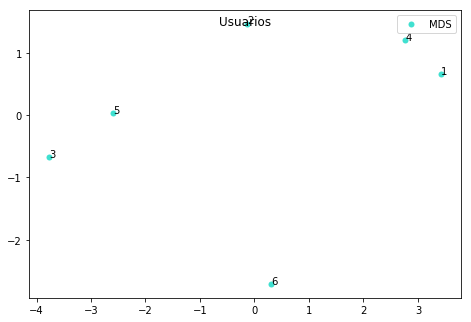

In [6]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
labels = range(1, res_usuarios.shape[0] + 1)

fig.suptitle('Usuarios')

plt.scatter(res_usuarios[:, 0], res_usuarios[:, 1], color='turquoise', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

distances = dist_usuarios.max() / dist_usuarios * 100
distances[np.isinf(distances)] = 0

for i, txt in enumerate(labels):
    ax.annotate(txt, (res_usuarios[i,0],res_usuarios[i,1]))

plt.show()

/home/mpicco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


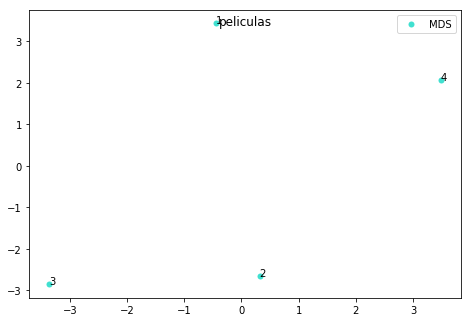

In [7]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
labels = range(1, res_peliculas.shape[0] + 1)

fig.suptitle('peliculas')

plt.scatter(res_peliculas[:, 0], res_peliculas[:, 1], color='turquoise', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

distances = dist_usuarios.max() / dist_usuarios * 100
distances[np.isinf(distances)] = 0

for i, txt in enumerate(labels):
    ax.annotate(txt, (res_peliculas[i,0],res_peliculas[i,1]))

plt.show()

[] Los dos usuarios mas diferentes son el 4 y el 5.

[X] Los dos usuarios mas diferentes son el 2 y el 3.

[] Los dos usuarios mas similares son el 2 y el 3.

[] Las dos películas mas diferentes son la 1 y la 2. 